<a href="https://colab.research.google.com/github/yuna1998/datamining/blob/main/Regression_prac.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Methods of estimating f
Linear regression : polynomial regression

In [ ]:
install.packages("ISLR")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
library(ISLR)

*Parametric method*

In [ ]:
fit <- lm(mpg ~ horsepower, data = Auto)
summary(fit)


Call:
lm(formula = mpg ~ horsepower, data = Auto)

Residuals:
     Min       1Q   Median       3Q      Max 
-13.5710  -3.2592  -0.3435   2.7630  16.9240 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 39.935861   0.717499   55.66   <2e-16 ***
horsepower  -0.157845   0.006446  -24.49   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.906 on 390 degrees of freedom
Multiple R-squared:  0.6059,	Adjusted R-squared:  0.6049 
F-statistic: 599.7 on 1 and 390 DF,  p-value: < 2.2e-16


KNN regression(nonparametic method) is more flexible. It may not have an explicit form of f.

We used all data to fit the models 
=> If we use more complex model with higher degree, the errors get smaller on the data. Because R^2 increas as the degree of polynomial increase.

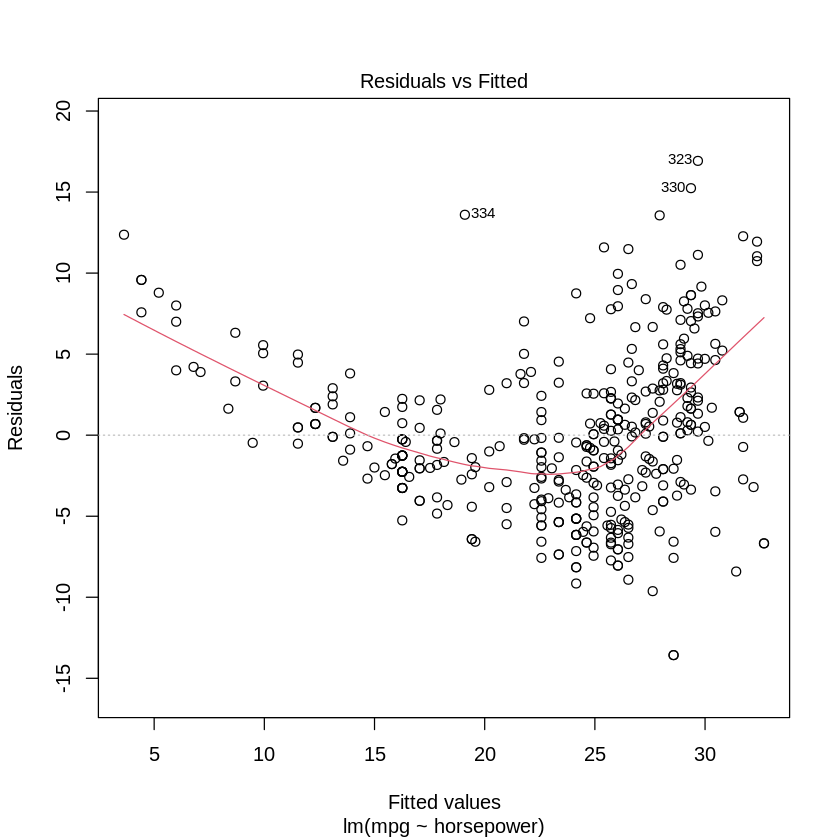

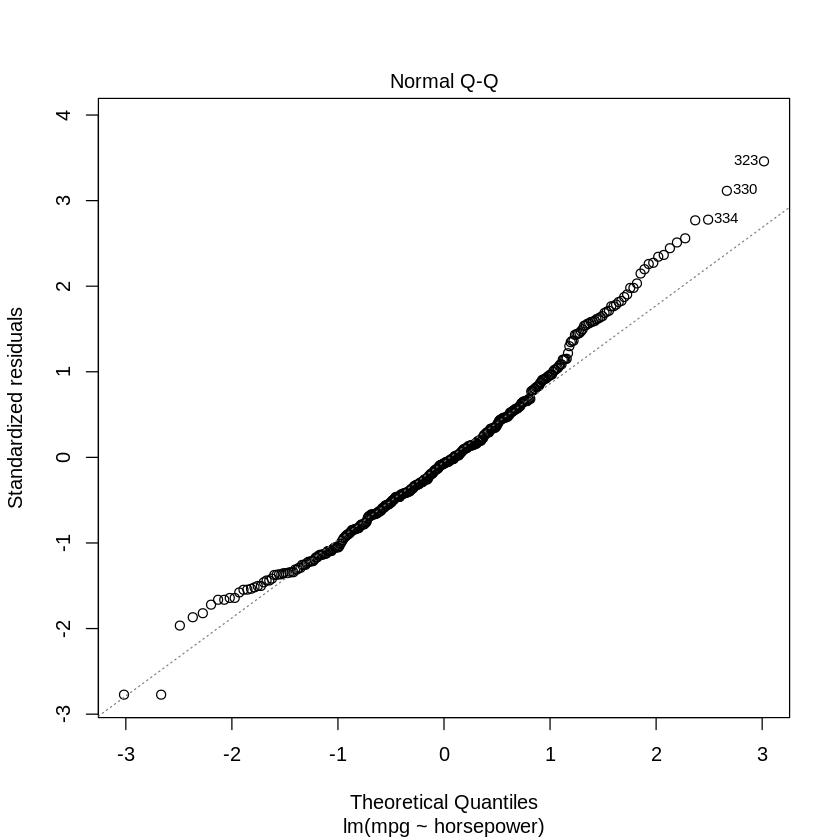

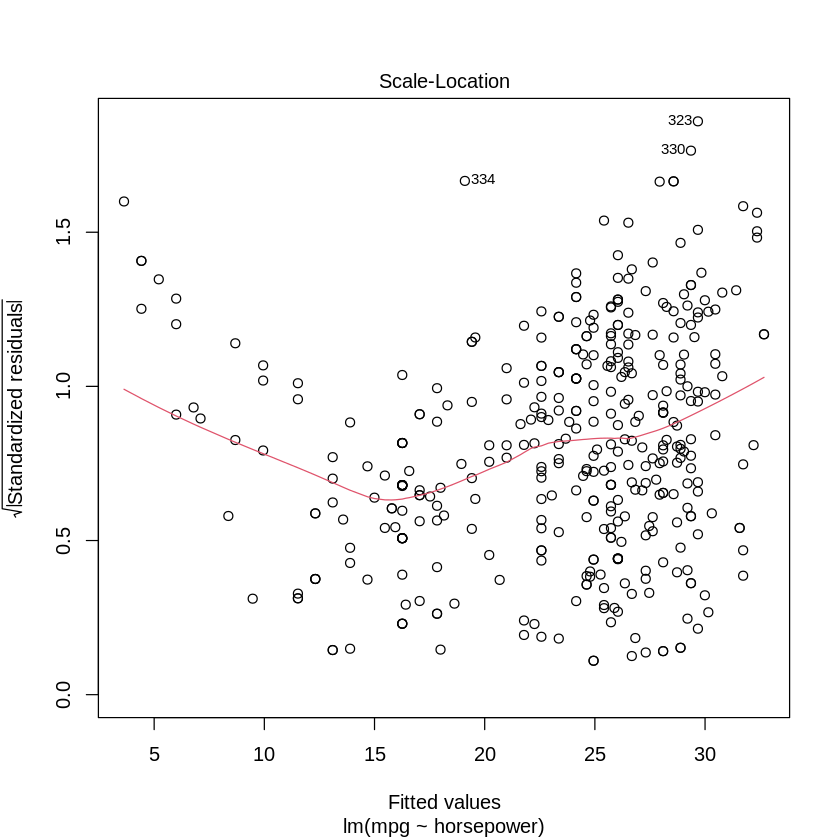

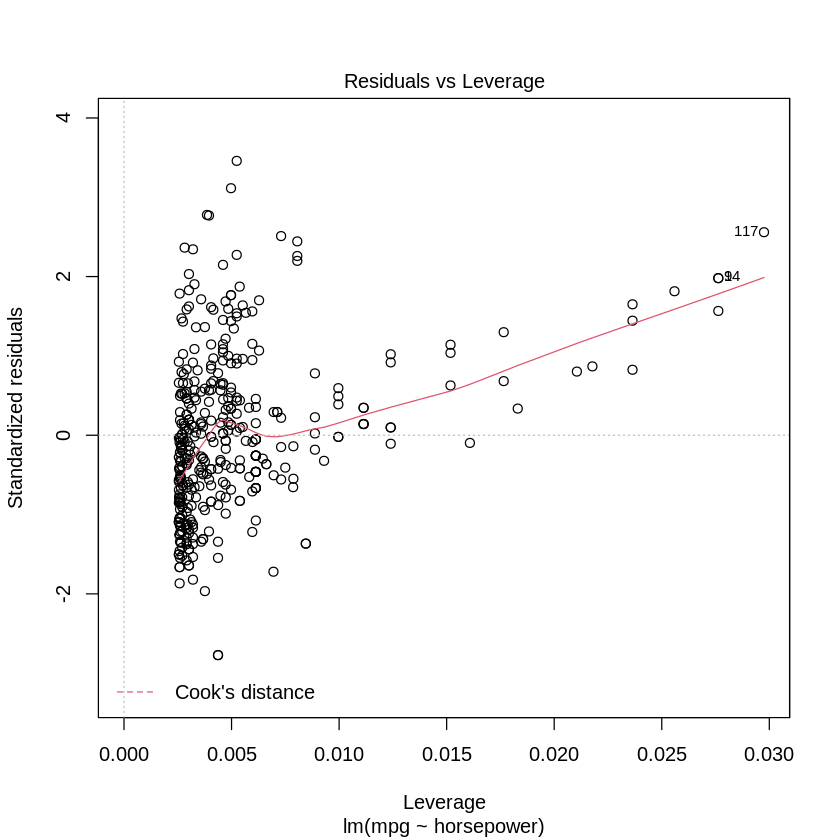

In [ ]:
plot(fit)

In [ ]:
fit2 <- lm(mpg~poly(horsepower, 2, raw = T), data = Auto)
summary(fit2)


Call:
lm(formula = mpg ~ poly(horsepower, 2, raw = T), data = Auto)

Residuals:
     Min       1Q   Median       3Q      Max 
-14.7135  -2.5943  -0.0859   2.2868  15.8961 

Coefficients:
                                Estimate Std. Error t value Pr(>|t|)    
(Intercept)                   56.9000997  1.8004268   31.60   <2e-16 ***
poly(horsepower, 2, raw = T)1 -0.4661896  0.0311246  -14.98   <2e-16 ***
poly(horsepower, 2, raw = T)2  0.0012305  0.0001221   10.08   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.374 on 389 degrees of freedom
Multiple R-squared:  0.6876,	Adjusted R-squared:  0.686 
F-statistic:   428 on 2 and 389 DF,  p-value: < 2.2e-16


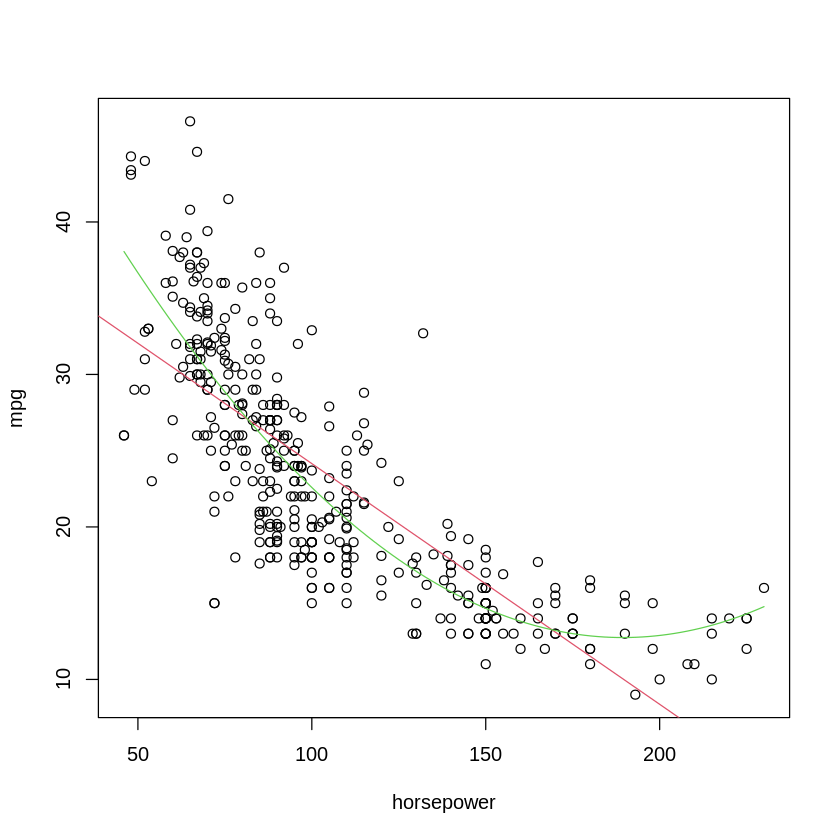

In [ ]:
with(Auto, plot(horsepower, mpg)) 
abline(fit, col=2)
curve(coef(fit2)[1] + coef(fit2)[2]*x + coef(fit2)[3]*x^2, add = T, col = 3)

*Nonparametric methods*


> KNN regression, Random Forest



In [ ]:
install.packages("caret")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘numDeriv’, ‘SQUAREM’, ‘lava’, ‘prodlim’, ‘iterators’, ‘data.table’, ‘gower’, ‘ipred’, ‘timeDate’, ‘foreach’, ‘plyr’, ‘ModelMetrics’, ‘reshape2’, ‘recipes’, ‘pROC’




In [ ]:
library(ISLR)
library(caret)

Loading required package: lattice

Loading required package: ggplot2

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”


In [ ]:
fit3 <- knnreg(data.frame(horsepower = Auto$horsepower), Auto$mpg, k  = 10)

In [ ]:
xt <- seq(46, 230, by = 0.001)

In [ ]:
yhat <- predict(fit3, data.frame(horsepower = xt))

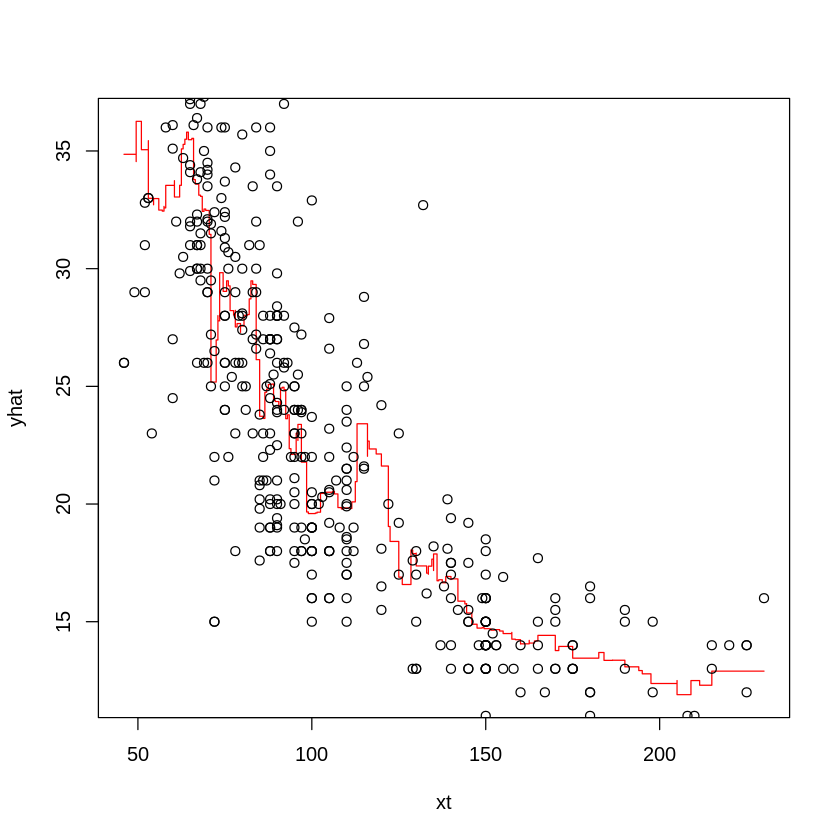

In [ ]:
plot(xt, yhat, type = 'l', col = 'red') 
with(Auto, points(horsepower, mpg))